In [1]:
import sys
import os
import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# import dateutil
# from scipy import __version__ as scipy_version
# import scipy.interpolate
# import scipy.stats
# from statsmodels import __version__ as statsmodels_version
# import statsmodels.formula.api as smformula

from collections import OrderedDict
from IPython.display import display, HTML

print(sys.version)
print('numpy', np.__version__)
print('matplotlib', mpl.__version__)
print('pandas',pd.__version__)
# print('scipy', scipy_version)
# print('statsmodels', statsmodels_version)

3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
numpy 1.15.0
matplotlib 2.2.3
pandas 0.22.0


In [2]:
# Setup plot style
%matplotlib notebook
plt.style.use('seaborn-paper')
mpl.rcParams['figure.facecolor'] = (0.8, 0.8, 0.8, 1)

In [3]:
df = pd.read_csv('../test5.log', header=None, sep='\t',
                 names=['time','T','TSP','RH','RHSP','AC','heat','humid','dehumid'])
df.index = pd.to_datetime(df['time'])

In [4]:
df

,time,T,TSP,RH,RHSP,AC,heat,humid,dehumid
time,,,,,,,,,
2018-11-26 23:51:46.259875,2018-11-26T13:51:46.259875-10:00,24.84,24.5,73.96,70.0,False,False,False,False
2018-11-26 23:51:56.289136,2018-11-26T13:51:56.289136-10:00,24.83,24.5,73.97,70.0,False,False,False,False
2018-11-26 23:52:06.318666,2018-11-26T13:52:06.318666-10:00,24.84,24.5,73.98,70.0,False,False,False,False
2018-11-26 23:52:16.348208,2018-11-26T13:52:16.348208-10:00,24.84,24.5,74.00,70.0,False,False,False,False
2018-11-26 23:52:26.377672,2018-11-26T13:52:26.377672-10:00,24.84,24.5,73.98,70.0,False,False,False,False
2018-11-26 23:52:36.399063,2018-11-26T13:52:36.399063-10:00,24.84,24.5,73.95,70.0,False,False,False,False
2018-11-26 23:52:46.428793,2018-11-26T13:52:46.428793-10:00,24.83,24.5,73.94,70.0,False,False,False,False
2018-11-26 23:52:56.458479,2018-11-26T13:52:56.458479-10:00,24.86,24.5,73.94,70.0,False,False,False,False
2018-11-26 23:53:06.488162,2018-11-26T13:53:06.488162-10:00,24.86,24.5,73.96,70.0,False,False,False,False


<IPython.core.display.Javascript object>


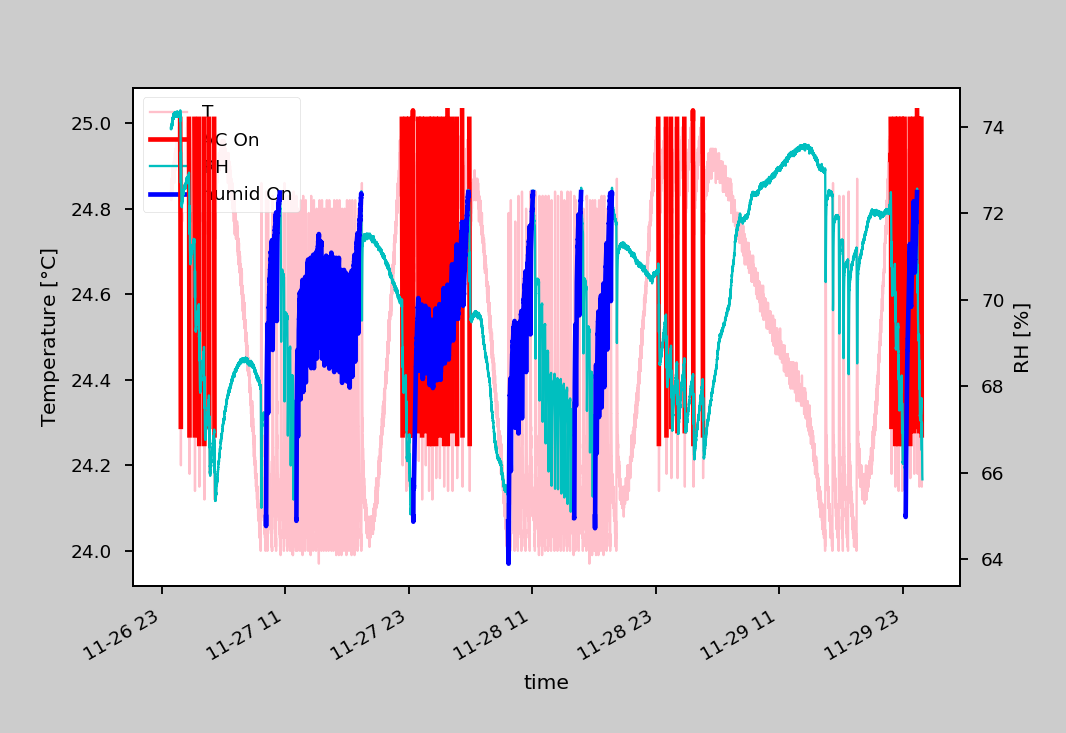

Text(0,0.5,'RH [%]')

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()

ax.plot(df.index, df['T'], ls='-', color='pink', label='T', lw=1)
ax2.plot(df.index, df['RH'], 'c-', label='RH', lw=1)

d = df.copy()
d.loc[~d['AC']] = np.nan
ax.plot(d.index, d['T'], 'r-', label='AC On', lw=2, zorder=6)

d = df.copy()
d.loc[~d['humid']] = np.nan
ax2.plot(d.index, d['RH'], 'b-', label='humid On', lw=2, zorder=6)

handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles+handles2, labels+labels2, loc='upper left')
fig.autofmt_xdate()
ax.set_xlabel('time')
ax.set_ylabel('Temperature [$\mathrm{\degree C}$]')
ax2.set_ylabel('RH [%]')

In [9]:
df.iloc[-1]

time       2018-11-29T14:55:02.368520-10:00
T                                     24.77
TSP                                    24.5
RH                                    65.85
RHSP                                     70
AC                                    False
heat                                  False
humid                                 False
dehumid                               False
Name: 2018-11-30 00:55:02.368520, dtype: object